# UCI Adult Income Classification

This project uses the UCI Adult Census Income dataset to predict whether a person earns more than $50K annually based on their demographic and employment attributes.

# Objectives:

- Understand the structure and distribution of the data
- Clean and preprocess the dataset
- Engineer new features that might improve model performance
- Train and evaluate classification models
- Use interpretability tools like SHAP and ELI5 to understand model predictions

# Introduction
The goal of this notebook is to accurately predict if an individual earns an annual income more then \\$50.000 using demographic features. This dataset is from UCI Machine Learning Repository. To predict whether an individual earns more then \\$50.000 a year I used the LogisticRegression and RandomforestClassifier from the scikit-learn. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-adult-income-dataset-census-income-50k/adult.data
/kaggle/input/uci-adult-income-dataset-census-income-50k/adult.names
/kaggle/input/uci-adult-income-dataset-census-income-50k/Index
/kaggle/input/uci-adult-income-dataset-census-income-50k/old.adult.names
/kaggle/input/uci-adult-income-dataset-census-income-50k/adult.test


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_data = pd.read_csv("/kaggle/input/uci-adult-income-dataset-census-income-50k/adult.data")

In [4]:
train_data.shape

(32560, 15)

In [5]:
features = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week",
           "native-country", "income"]

In [6]:
train_data.columns = features

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
* Their are no null values in this dataset.
* The following columns contain numerical data: Age, Final Weight, Education Number, Capital Gain, Capital Loss, and Hours Per Week
* The following columns contain object data: WorkClass, Education, Marital Status, Occupation, Relationship, Race, Sex, Native Country and Income.
* Although there are no null values, the Workclass, Occupation, and Native Country columns have instances of '?'.These values will have to be replaced. 

In [8]:
df = pd.DataFrame(train_data)
df.replace(" ?",np.NaN, inplace=True)
train_data['income'] = train_data['income'].str.strip()

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education-num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital-gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital-loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


Observation:
* Respondents in this dataset have an average age of 38, ranging from 17 to 90 years old.
* Hours spent per week varies from 1 to 99 hours with an average of 40 hours per week.
* Years spent on education is from 1 to 16 years with an average of 10 years.

Explore and Visualize

In [12]:
train_data_copy = train_data

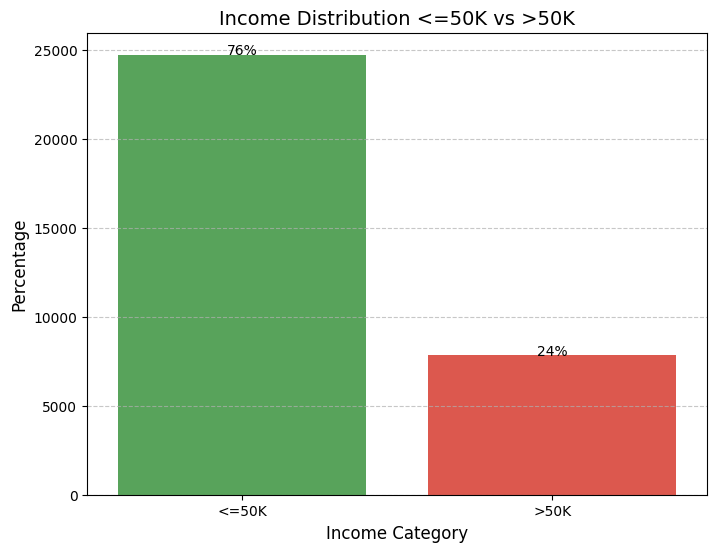

In [13]:
import seaborn as sns
total = len(train_data_copy['income'])
percentages = train_data_copy['income'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=train_data_copy,
    x='income',
    order=percentages.index,
    palette={'<=50K': '#4CAF50', '>50K': '#F44336'}
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 3,
        f'{round(height/total*100)}%',
        ha='center'
)

plt.title('Income Distribution <=50K vs >50K', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Observation:
* The data was collected in 1996 and based on this data we can see that 24% of the individuals earned a salary more then \\$50.000 a year.
* 76% of the individuals earned a salary less or equal to \\$50.000 a year.

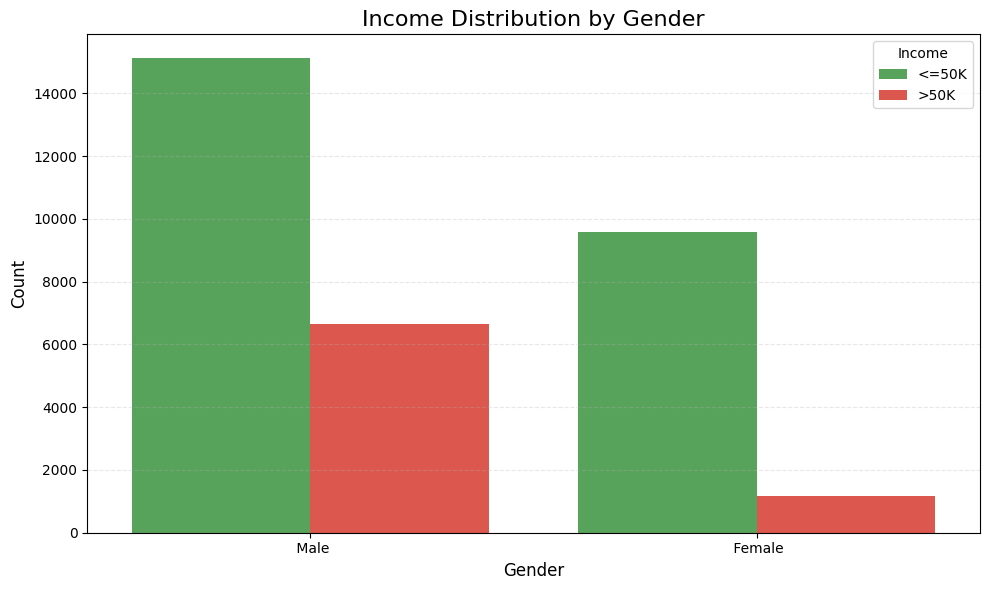

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=train_data_copy,
    x='sex',
    hue='income',
    palette={'<=50K': '#4CAF50', '>50K': '#F44336'}
)

plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Observation:

We can see that there is a significant wage gape between males and females earning an annual salary above the \\$50.000.
* 31% of the males earned more then 50K annually.
* 10% of the females earned more then 50K annually.
* 89% of the females earned less or equal to 50K annually.

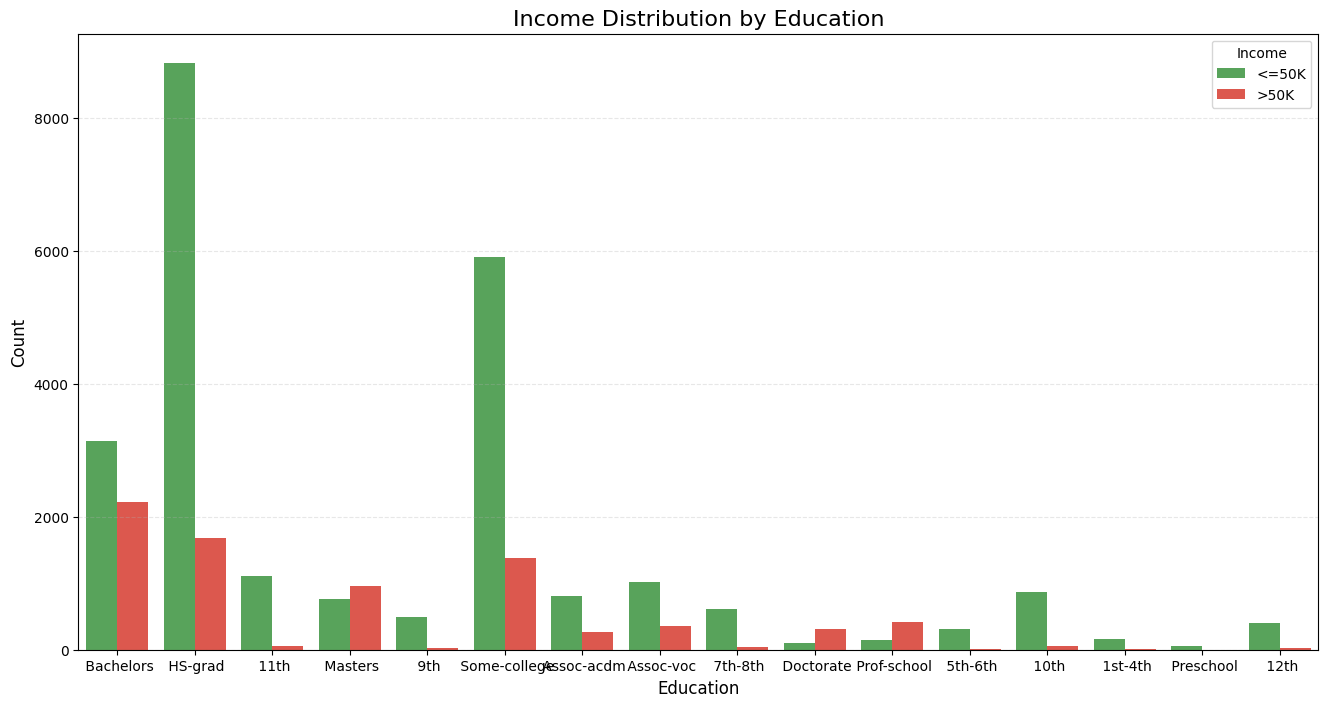

In [15]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(
    data=train_data_copy,
    x='education',
    hue='income',
    palette={'<=50K': '#4CAF50', '>50K': '#F44336'}
)

plt.title('Income Distribution by Education', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income')
plt.grid(axis='y', linestyle='--', alpha=0.3)

Observations:

* Respondents with a Bachelors, Highschool Grad, Masters and some-college degree where likely to earn more then \\$50.000 a year.
* But the data also shows that the majority of the individuals with a Highschool Grad, Some-college, Bachelors degree earned less or equal to 50K a year.

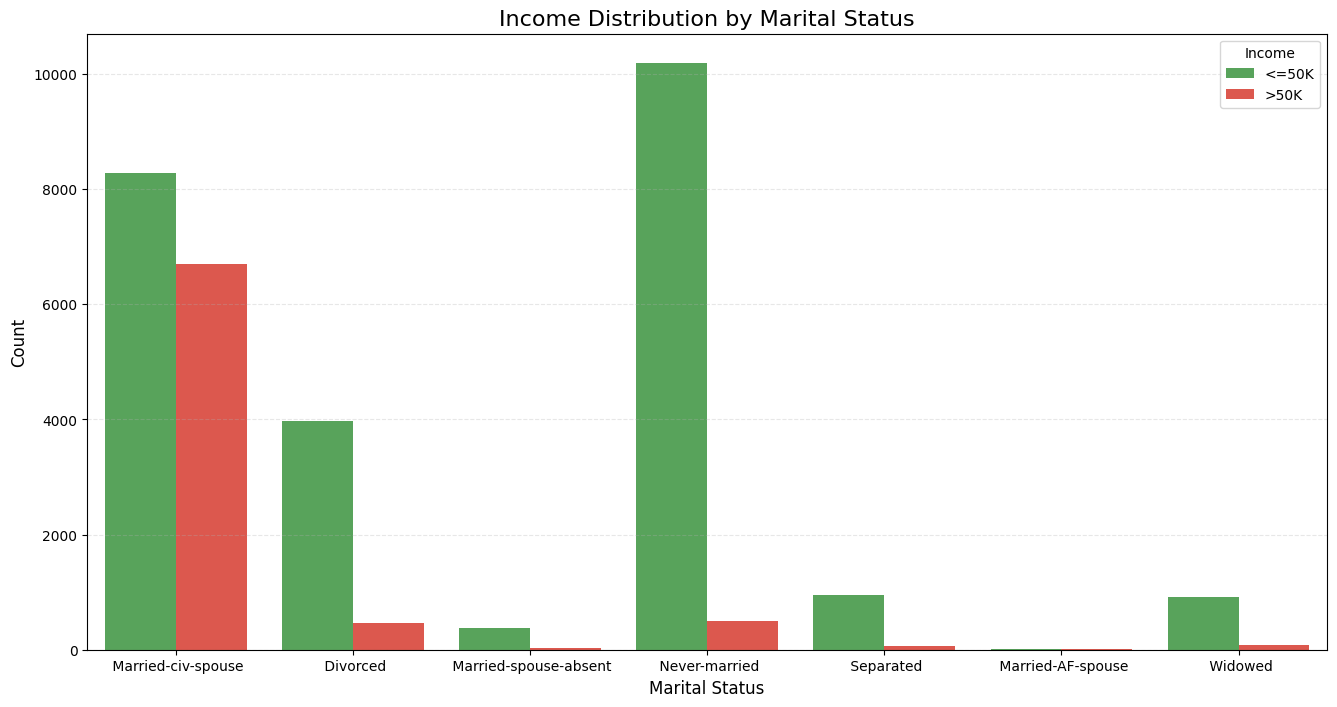

In [16]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(
    data=train_data_copy,
    x='marital-status',
    hue='income',
    palette={'<=50K': '#4CAF50', '>50K': '#F44336'}  # Green/Red colors
)

plt.title('Income Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income')
plt.grid(axis='y', linestyle='--', alpha=0.3)

Observation:
* Respondents who have never been married tend to have incomes at or below 50K annually.
* Married adults show a higher likelihood of falling within the >\\$50k earnings range compared to their  unmarried counterparts.
* Divorced respondents in the dataset predominantly fall into the sub-$50K income bracket.

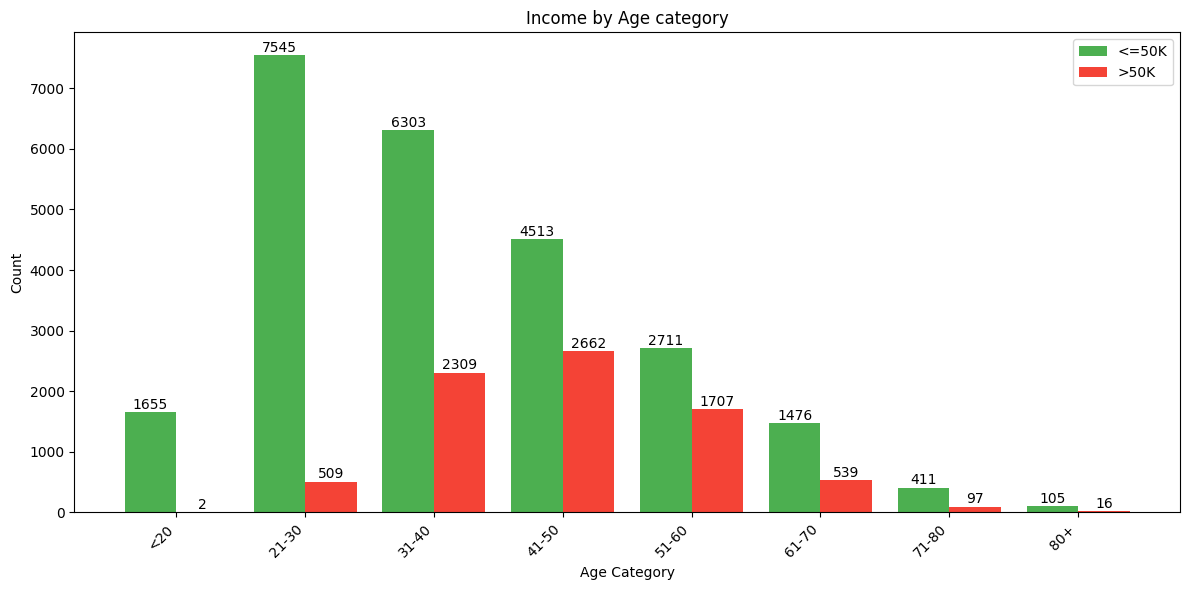

In [17]:
age_category = { 
    "<20": {"<=50K": 0, ">50K": 0},
    "21-30": {"<=50K": 0, ">50K": 0},
    "31-40": {"<=50K": 0, ">50K": 0},
    "41-50": {"<=50K": 0, ">50K": 0},
    "51-60": {"<=50K": 0, ">50K": 0},
    "61-70": {"<=50K": 0, ">50K": 0},
    "71-80": {"<=50K": 0, ">50K": 0},
    "80+": {"<=50K": 0, ">50K": 0},
}

age_income = train_data_copy.groupby(["age", "income"])

def get_age_category(age):
    if age < 20: return "<20"
    elif age < 30: return "21-30"
    elif age < 40: return "31-40"
    elif age < 50: return "41-50"
    elif age < 60: return "51-60"
    elif age < 70: return "61-70"
    elif age < 80: return "71-80"
    else: return "80+"

for (age, income), group in age_income:
    category = get_age_category(age)
    income_key = "<=50K" if income == "<=50K" else ">50K"
    age_category[category][income_key] += len(group)

bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(age_category))

income_age_category = pd.DataFrame(age_category).T

bars1_less50K = ax.bar(index - bar_width/2, income_age_category["<=50K"], bar_width, label='<=50K', color="#4CAF50")
bars2_more50K = ax.bar(index + bar_width/2, income_age_category[">50K"], bar_width, label='>50K', color="#F44336")

ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
ax.set_title('Income by Age category')
ax.set_xticks(index)
ax.set_xticklabels(income_age_category.index, rotation=45, ha='right')
ax.legend()

for bars in [bars1_less50K, bars2_more50K]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{height}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Observation:

When we look at the age category we see that:
* Annual salaries above $50K are more common among adults aged 31-60, whereas younger workers (21-30) typically earn less.


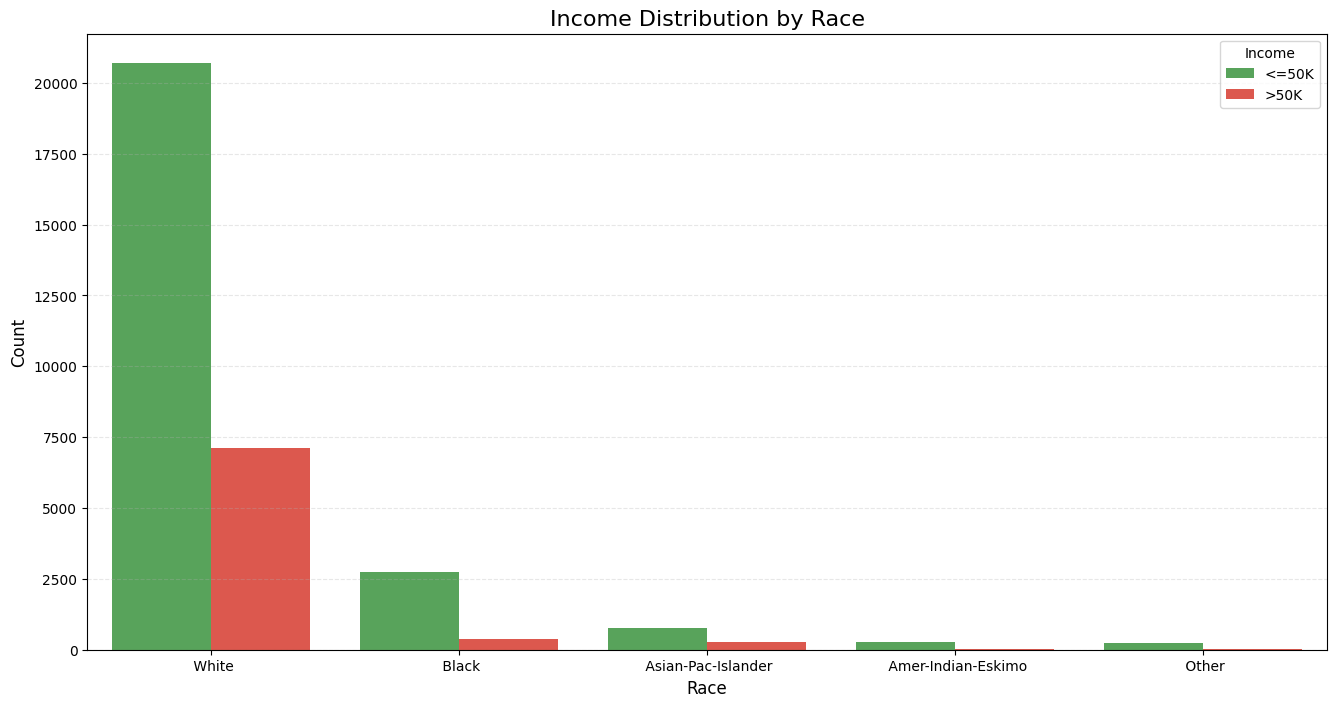

In [18]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(
    data=train_data_copy,
    x='race',
    hue='income',
    palette={'<=50K': '#4CAF50', '>50K': '#F44336'}  # Green/Red colors
)

plt.title('Income Distribution by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Income')
plt.grid(axis='y', linestyle='--', alpha=0.3)

Observation:
* The data reveals that White individuals constitute the majority of those earning above $50K compared to other racial groups.

In [19]:
df = pd.DataFrame(train_data_copy)
df["income"] = df["income"].map({'<=50K': 0, '>50K': 1})

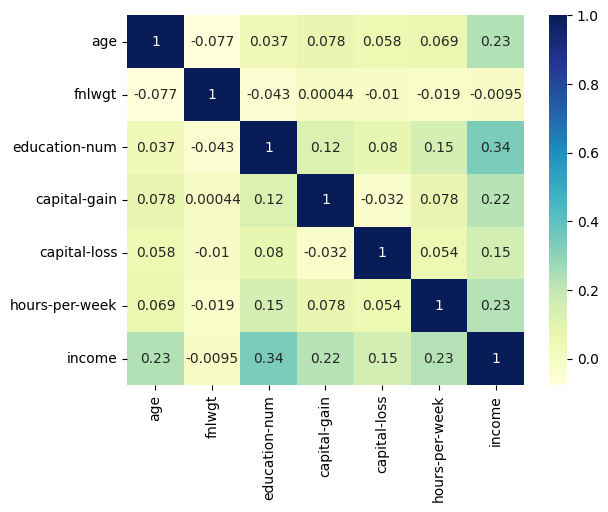

In [20]:
import seaborn as sns
from IPython.display import Image
num_corr = df.select_dtypes(include=['int64', 'float64']).columns
corr_mtx = df[num_corr].corr()
sns.heatmap(corr_mtx, cmap="YlGnBu", annot=True)
plt.show()

Observation:

I used a correlation matrix to analyze the relationships between the numerical independent features and the dependent variable. Most of the features show a positive correlation with Income.

### Split into Features and Target

In [21]:
X = train_data.drop("income", axis=1)
y = train_data["income"]

In [22]:
X.shape

(32560, 14)

In [23]:
y.shape

(32560,)

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Feature engineering

In [25]:
X_train["capital_gain_group"] = X_train["capital-gain"] - X_train["capital-loss"]
X_valid["capital_gain_group"] = X_valid["capital-gain"] - X_valid["capital-loss"]

In [26]:
X_train.drop(["capital-gain", "capital-loss"], axis=1, inplace=True)
X_valid.drop(["capital-gain", "capital-loss"], axis=1, inplace=True)

Preprocessing Pipelines

In [27]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

In [28]:
# Num pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

### Encoding Categorical Variables

In [29]:
# Cat pipeline
cat_pipeline = Pipeline([
     ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

In [30]:
# Full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols), 
    ("cat", cat_pipeline, cat_cols)
])

Precossed Data

In [31]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_valid_prepared = full_pipeline.transform(X_valid)

### Model Evaluation

In [40]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_prepared, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# LogisticRegression Predictions
from sklearn.metrics import classification_report
y_pred_lr = model_lr.predict(X_valid_prepared)

# Accuracy score
accuracy = accuracy_score(y_valid, y_pred_lr)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

print(classification_report(y_valid, y_pred_lr, target_names=["<=50K", ">50K"]))

Accuracy Score: 84.78%
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4912
        >50K       0.73      0.61      0.66      1600

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.78      6512
weighted avg       0.84      0.85      0.84      6512



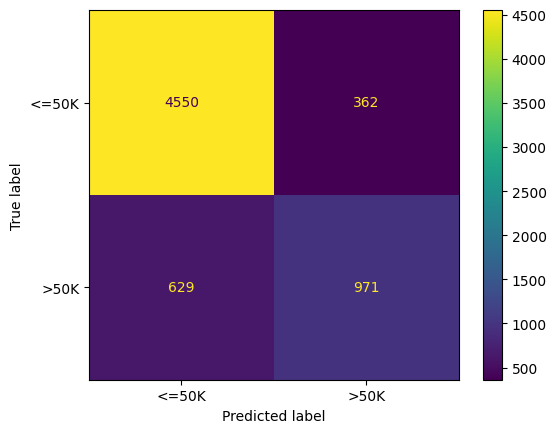

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_lr)
plt.show()

In [44]:
model_rfc = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=20)
model_rfc.fit(X_train_prepared, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [45]:
# RandomForestClassifier Predictions
from sklearn.metrics import classification_report
y_pred_rfc = model_rfc.predict(X_valid_prepared)

# Accuracy score
accuracy = accuracy_score(y_valid, y_pred_rfc)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

print(classification_report(y_valid, y_pred_rfc, target_names=["<=50K", ">50K"]))

Accuracy Score: 86.24%
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4912
        >50K       0.78      0.62      0.69      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512



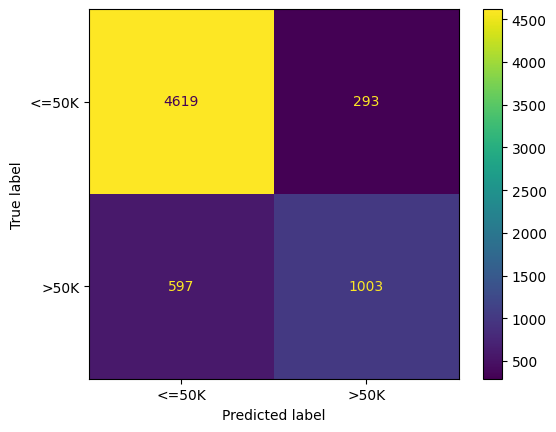

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_rfc)
plt.show()

# Conclusion

## Model Evaluation Summary

Here we compare the performance of the models trained:

| Model                | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 85%     | 73%        | 61%     | 66%     |
| Random Forest       | 86%     | 78%       | 62%    | 69%       |
| ...                 | ...      | ...       | ...    | ...      |

The objective of this classification task is to determine whether an individual earns more than \\$50K annually. Due to the class imbalance (approximately 75% earn ≤\\$50K vs. 25% >\$50K), accuracy is not an appropriate performance metric. Instead, precision was prioritized, especially for the >\\$50K class, achieving 77%. This indicates that when the model predicts someone earns >\\$50K, it is correct 77% of the time.

Between the two models tested, Random Forest outperformed Logistic Regression, particularly in identifying higher-income individuals. However, both models exhibited relatively low recall, meaning they missed a significant portion of actual high earners. This is likely a consequence of the class imbalance. Future improvements could involve techniques such as resampling, class weighting, or threshold tuning to improve recall without sacrificing precision

## Model Interpretability

To understand why the model makes specific predictions:

- I used **ELI5** method for linear models (like Logistic Regression)
- I used the **SHAP** method for tree-based models (like Random Forest)

These tools helped me to identify the most influential features contributing to predictions.

In [43]:
import eli5

X_valid_prepared_dense_lr = pd.DataFrame(X_valid_prepared, columns=full_pipeline.get_feature_names_out()).astype(float)

eli5.show_weights(model_lr, feature_names=X_valid_prepared_dense_lr.columns.tolist())

Weight?,Feature
+1.758,num__capital_gain_group
+1.546,cat__marital-status_ Married-civ-spouse
+1.356,cat__relationship_ Wife
+1.174,cat__native-country_ Cambodia
+1.002,cat__marital-status_ Married-AF-spouse
+0.953,cat__occupation_ Exec-managerial
+0.948,cat__native-country_ Italy
+0.784,num__education-num
+0.732,cat__workclass_ Federal-gov
+0.724,cat__occupation_ Tech-support


**ELI5**

By applying ELI5 to a Logistic Regression model, I identified key features influencing predictions for individuals earning above $50K/year:

**Numerical Features**

Capital gain and education number were the most influential numerical factors. Higher values in these features strongly correlated with a higher probability of earning >$50K.

**Categorical Features**

Marital status: Being classified as "Married-civ-spouse" or "Married-AF-spouse" positively impacted predictions.

Relationship: The category "Wife" (likely a typo for "Wife") was associated with higher salaries.

Native country: Surprisingly, "Cambodia" appeared as a notable factor, though further investigation is needed to determine if this reflects a true trend or a data artifact.

**Interpretation**

The model suggests that marital status, education level, and capital gains are key drivers of higher-income predictions. However, categorical features like "Cambodia" may require deeper analysis to rule out biases or data noise.

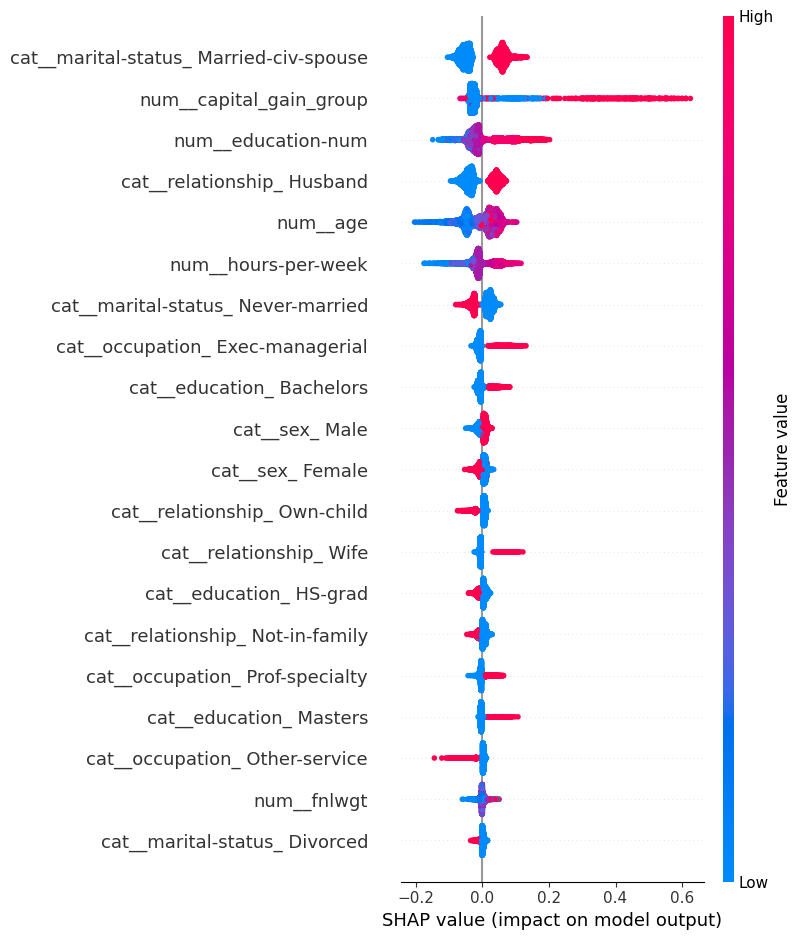

In [46]:
import shap

X_valid_prepared_dense_rfc = pd.DataFrame(X_valid_prepared, columns=full_pipeline.get_feature_names_out()).astype(float)

# Create the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(model_rfc)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_valid_prepared_dense_rfc)

shap.summary_plot(shap_values[1], X_valid_prepared_dense_rfc)

**SHAP Analysis for Tree-Based Model: Random Forest**

Using SHAP (SHapley Additive exPlanations) on the RandomForestClassifier, I identified the key features influencing predictions for individuals earning above \$50K per year:

**Numerical Features**

The most influential numerical features are:

Education number: Higher values correlate with a greater likelihood of earning above \$50K.

Hours per week: More weekly working hours increase the predicted probability of higher income.

Capital gain: Higher capital gains strongly associate with earnings above the threshold.

**Categorical Features**

Key categorical features impacting predictions include:

Marital status: Individuals labeled as "Married-civ-spouse" have a positive effect on predictions.

Relationship: Those with the status "Husband" or "Wife" show a strong tendency toward higher earnings.

Occupation: People in "Exec-Managerial" roles are more likely to earn above \$50K.

**Conclusion**

The SHAP analysis highlights that marital status, education level, weekly working hours, and capital gains are the most significant factors in predicting whether an individual earns more than \$50K annually.